###AUTHOR  :**TIYASHA SAMANTA**
###Python 3 Concept : **Linear Regression(Prediction)**
###Github : https://github.com/ts4475

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('/content/Student.csv')
x = data['Physics']
y = data['Percentage']

In [7]:
print(data.head())

   Maths  Physics  Chemistry  Total Marks  Percentage
0     50       27         22           99   33.000000
1     72       82         77          231   77.000000
2     85       18         13          116   38.666667
3      8       42         37           87   29.000000
4     32       25         20           77   25.666667


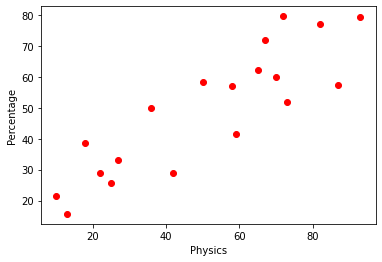

In [8]:
plt.scatter(x,y,c="red")
plt.xlabel('Physics')
plt.ylabel('Percentage')
plt.show()

**CALCULATING SLOPE,INTERCEPT AND EQUATION**

In [9]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    #Calculatin Slope using Formula
    B1_num = ((x - x_mean) * (y - y_mean)).sum() #summation of numerator
    B1_den = ((x - x_mean)**2).sum() #summation of denominator
    B1 = B1_num / B1_den #dividing num/den to get the slope

    B0 = y_mean - (B1*x_mean) #intercept
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3)) #equation is obtained here
    
    return (B0, B1, reg_line)

**HOW WELL THE REGRESSION LINE FITS**

In [10]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [11]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)


Regression Line:  y = 15.186870349027295 + 0.671β
Correlation Coef.:  0.8756689257131653
"Goodness of Fit":  0.7667960674596491


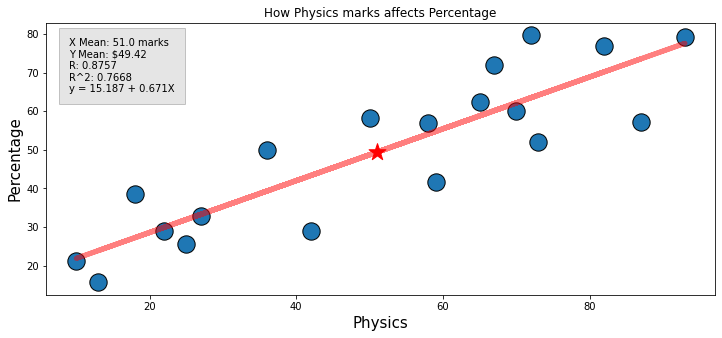

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} marks
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=9, y=65, s=text, fontsize=10, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Physics marks affects Percentage')
plt.xlabel('Physics', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

In [13]:
x=data.iloc[:,1:2]
x.head(2)


,Physics
0,27
1,82


In [14]:
y=data.iloc[:,4:5]
y.head(2)

,Percentage
0,33.0
1,77.0


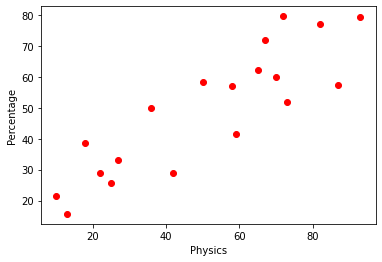

In [15]:
plt.scatter(x,y,c="red")
plt.xlabel('Physics')
plt.ylabel('Percentage')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

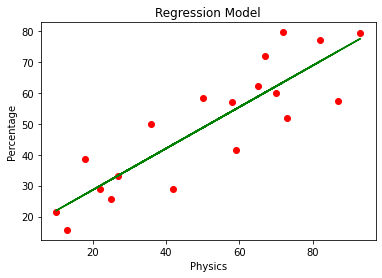

In [17]:
plt.scatter(x,y,c="red")
plt.plot(x,lin_reg.predict(x),color='green')
plt.title("Regression Model")
plt.xlabel('Physics')
plt.ylabel('Percentage')
plt.show()

In [18]:
ypredict=lin_reg.predict(np.array([[70]]))
ypredict

array([[62.17496368]])

In [19]:
lin_reg.coef_


array([[0.67125848]])

In [20]:
lin_reg.intercept_

array([15.18687035])

In [21]:
ypredict=lin_reg.predict(x)
ypredict

array([[33.3108492 ],
       [70.23006539],
       [27.26952292],
       [43.37972635],
       [31.96833225],
       [64.18873911],
       [48.74979416],
       [62.17496368],
       [77.61390863],
       [54.11986196],
       [39.35217549],
       [29.95455682],
       [63.51748063],
       [23.91323054],
       [54.79112044],
       [58.8186713 ],
       [73.58635777],
       [21.89945511],
       [60.16118825]])

In [22]:
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print ("Coefficient of determination :",r2_score(y,ypredict))
print ("MSE: ",mean_squared_error(y,ypredict))
print("RMSE: ",np.sqrt(mean_squared_error(y,ypredict)))

Coefficient of determination : 0.7667960674596501
MSE:  90.05447273064492
RMSE:  9.489703511208605
